In [156]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# Import libraries 
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import r2_score


# Pretty display for notebooks
%matplotlib inline


In [157]:

# Load the Boston housing dataset
data = pd.read_csv('/kaggle/input/bostonhoustingmlnd/housing.csv')
prices = data['MEDV']
features = data.drop(columns=['MEDV','PTRATIO'],axis=1) #ignoring PTRATIO as it appears to have no relation to prices, and improved accurcy 
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


In [158]:
def performance_metric(y_true, y_pred):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_pred)
    
    # Return the score
    return score

In [159]:
print(data.describe())

               RM       LSTAT     PTRATIO          MEDV
count  489.000000  489.000000  489.000000  4.890000e+02
mean     6.240288   12.939632   18.516564  4.543429e+05
std      0.643650    7.081990    2.111268  1.653403e+05
min      3.561000    1.980000   12.600000  1.050000e+05
25%      5.880000    7.370000   17.400000  3.507000e+05
50%      6.185000   11.690000   19.100000  4.389000e+05
75%      6.575000   17.120000   20.200000  5.187000e+05
max      8.398000   37.970000   22.000000  1.024800e+06


In [160]:
minimum_price= np.min(prices)
# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429474


array([[<Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'LSTAT'}>],
       [<Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'MEDV'}>]], dtype=object)

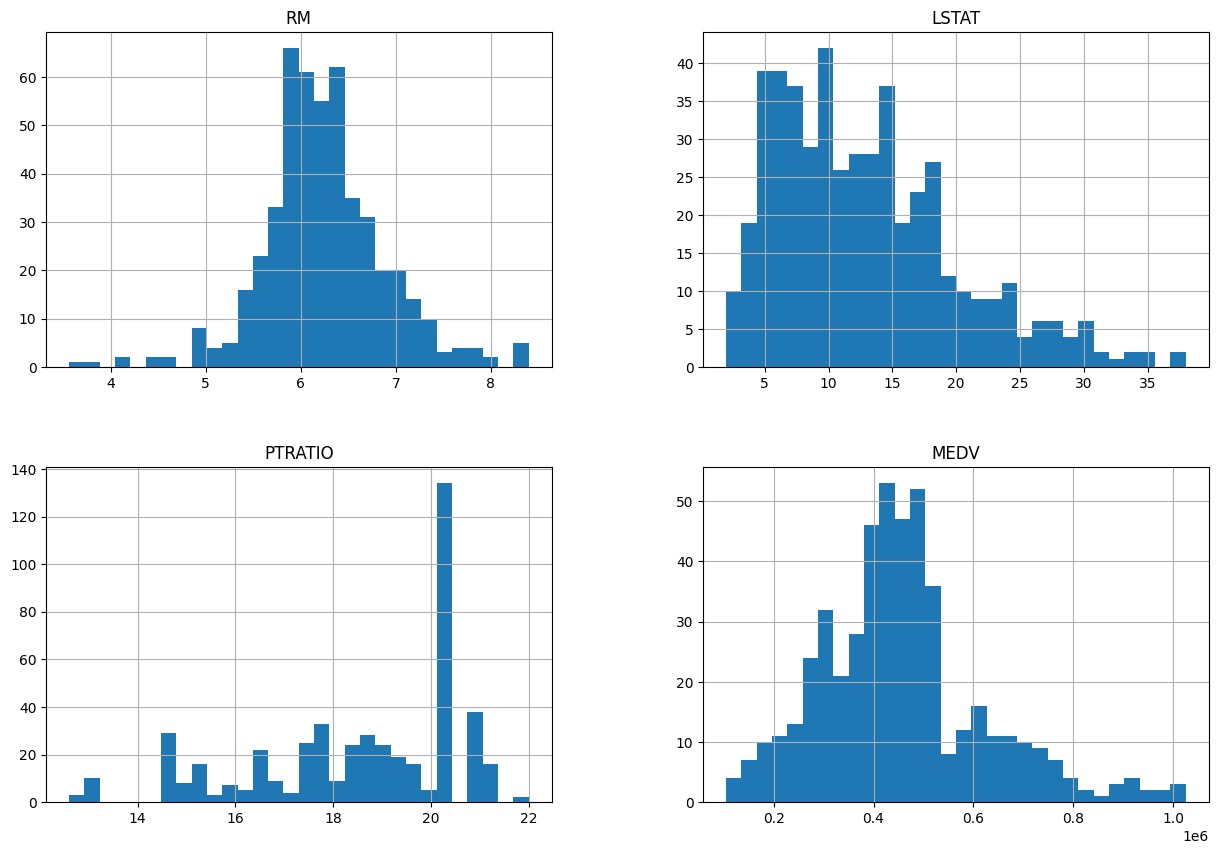

In [161]:
data.hist(bins=30, figsize=(15, 10))

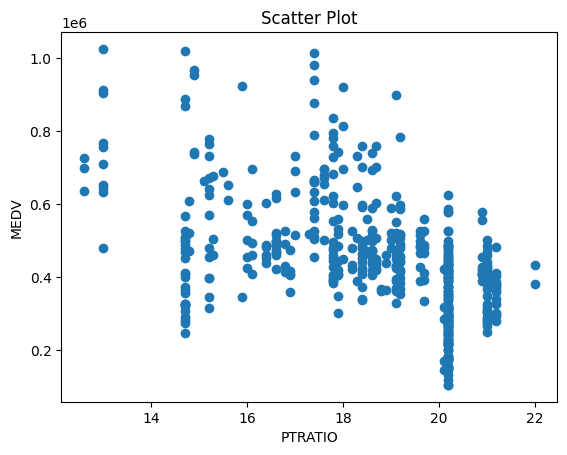

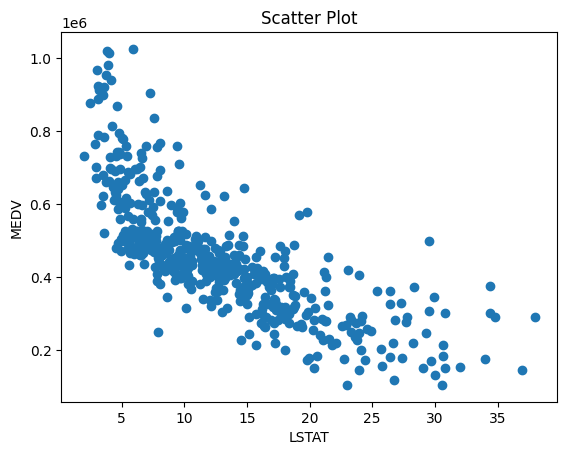

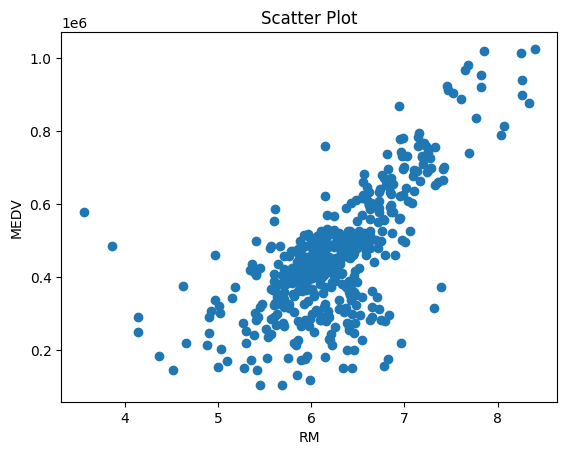

In [162]:
plt.scatter(data['PTRATIO'], data['MEDV'])
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')
plt.title('Scatter Plot')
plt.show()
plt.scatter(data['LSTAT'], data['MEDV'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Scatter Plot')
plt.show()
plt.scatter(data['RM'], data['MEDV'])
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Scatter Plot')
plt.show()

In [163]:
X=features.to_numpy()
y=prices.to_numpy()
shuffle_split = ShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data
for train_index, test_index in shuffle_split.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [164]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [165]:
# Create and train linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)



In [166]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 8065438130.30348


In [167]:
input = [[6.575,4.98]]
input_scaled = scaler.transform(input)
pred = model.predict(input_scaled)
pred

array([589042.41781562])

[](http://)returned value of 589042 and expected value was 504000